In [2]:
#Сравнение с площадью хаотических островков нашей кривой!

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy import integrate

In [3]:
# LYAPUNOV CHARACTERISTICS
n_ita = 100
n_k = 50
num = 100

k = np.linspace(0,5,n_k)

# Задание начальных условий
eig = np.zeros([num, 2*num, n_k, 3])
eig_max = np.zeros([num, 2*num, n_k])
lyapunov_max = np.zeros([num, 2*num, n_k])

theta_i = np.zeros([num, 2*num])
phi_i = np.zeros([num, 2*num])

for j in range(num):
    if j < num - 1:
        theta_i[j+1, :] = theta_i[j, :] + np.pi/num
for t in range(2*num):
    if t < 2*num - 1:
        phi_i[:, t+1] = phi_i[:, t] + np.pi/num

theta_final = np.zeros([num, 2*num])
phi_final = np.zeros([num, 2*num])


# for ik in range (n_k):
    for j in range(num):
        for t in range(2*num):
            x_i = np.zeros([n_ita])
            y_i = np.zeros([n_ita])
            z_i = np.zeros([n_ita])

            x_fi = 0
            y_fi = 0
            z_fi = 0

            x_i[0], y_i[0], z_i[0] = sphere_to_decart(theta_i[j, t], phi_i[j, t])
            
            M_L_product = np.ones([3,3])
            for l in range(1, n_ita):
                x_fi, y_fi, z_fi = functionF(x_i[l-1], y_i[l-1], z_i[l-1], k[ik], 0.1)
                x_i[l] = x_fi
                y_i[l] = y_fi
                z_i[l] = z_fi

                M_L = Matrix_Lyap(x_i[l-1],y_i[l-1],z_i[l-1],k[ik],0.1)
                M_L_product = M_L_product @ M_L

            eig[j,t,ik,:] = sp.linalg.eigh(M_L_product, eigvals_only=True)
            eig_max[j,t,ik] = eig[j,t,ik,:].max()
            lyapunov_max[j,t,ik] = np.log(eig_max[j,t,ik]**(1/n_ita))

In [4]:
k = np.load('/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP — ИСПРАВЛЕНА ОШИБКА с сферическими координатами /K_for_fit.npy')

In [5]:
k

array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 5. ])

In [139]:
import multiprocessing as mp
from parallel_KSentropy import process_ik

if __name__ == '__main__':
    # Остальной код остается без изменений
       # Ваш основной код, включая инициализацию данных
    num = 100
    n_ita = 500
    n_k = 20

    k = np.linspace(0,7,n_k)
    
    eig_max = np.zeros([num, 2*num, n_k])
    lyapunov_max = np.zeros([num, 2*num, n_k])

    theta_i = np.zeros([num])
    phi_i = np.zeros([2*num])

    # Основной параллельный код
    with mp.Pool(processes=4) as pool:
        results = pool.starmap(process_ik, [(ik, theta_i, phi_i, num, n_ita, k) for ik in range(n_k)])
    
    # Объединение результатов
    for ik, eig_max_res, lyapunov_max_res in results:
        eig_max[:, :, ik] = eig_max_res
        lyapunov_max[:, :, ik] = lyapunov_max_res

Python(41108) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41109) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(41110) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41111) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  

In [885]:
np.save('lyapunov_max.npy',lyapunov_max)

In [189]:
import multiprocessing as mp
from parallel_KSentropy import process_ik

if __name__ == '__main__':
    # Остальной код остается без изменений
       # Ваш основной код, включая инициализацию данных
    num = 100
    n_ita = 500

    k = np.load('/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP — ИСПРАВЛЕНА ОШИБКА с сферическими координатами /K_for_fit.npy')
    n_k = k.shape[0]
    
    eig_max = np.zeros([num, 2*num, n_k])
    lyapunov_max = np.zeros([num, 2*num, n_k])

    theta_i = np.zeros([num])
    phi_i = np.zeros([2*num])

    # Основной параллельный код
    with mp.Pool(processes=4) as pool:
        results = pool.starmap(process_ik, [(ik, theta_i, phi_i, num, n_ita, k) for ik in range(n_k)])
    
    # Объединение результатов
    for ik, eig_max_res, lyapunov_max_res in results:
        eig_max[:, :, ik] = eig_max_res
        lyapunov_max[:, :, ik] = lyapunov_max_res

Python(41226) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41227) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(41228) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(41229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))


In [7]:
import multiprocessing as mp
from parallel_KSentropy import process_ik

if __name__ == '__main__':
    # Остальной код остается без изменений
       # Ваш основной код, включая инициализацию данных
    num = 100
    n_ita = 50
    n_k = k.shape[0]
    
    eig_max = np.zeros([num, 2*num, n_k])
    lyapunov_max = np.zeros([num, 2*num, n_k])

    theta_i = np.zeros([num])
    phi_i = np.zeros([2*num])

    # Основной параллельный код
    with mp.Pool(processes=4) as pool:
        results = pool.starmap(process_ik, [(ik, theta_i, phi_i, num, n_ita, k) for ik in range(n_k)])
    
    # Объединение результатов
    for ik, eig_max_res, lyapunov_max_res in results:
        eig_max[:, :, ik] = eig_max_res
        lyapunov_max[:, :, ik] = lyapunov_max_res


Python(40478) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40479) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(40480) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(40481) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))


In [417]:
theta_i = np.zeros([num])
phi_i = np.zeros([2*num])

for j in range(num):
    if j < num - 1:
        theta_i[j+1] = theta_i[j] + np.pi/num
for t in range(2*num):
    if t < 2*num - 1:
        phi_i[t+1] = phi_i[t] + np.pi/num

# X, Y = np.meshgrid(phi_i, theta_i)

# for i in range(n_k):
#     plt.pcolor(X, Y, lyapunov_max[:,:,i])
#     plt.colorbar()
#     plt.show()

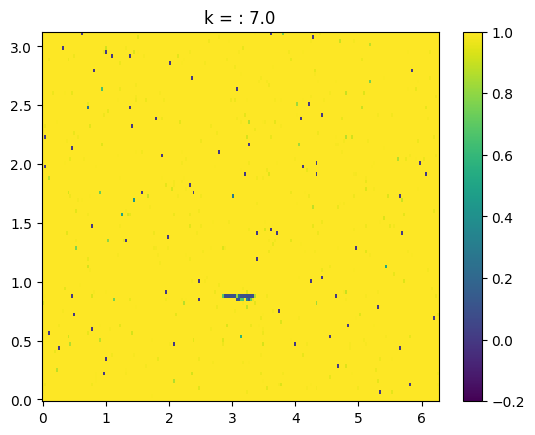

In [143]:
# Начальная настройка отображения данных
fig, ax = plt.subplots()

# Начальная настройка отображения данных
cax = ax.pcolormesh(X, Y, lyapunov_max[:, :, 0], shading='auto')
cbar = fig.colorbar(cax)

# Функция для обновления графика
def animate(i):
    cax.set_array(lyapunov_max[:, :, i].ravel())
    cax.set_clim(vmin=-0.2, vmax=1)
    ax.set_title(f'k = : {k[i]}')
    return cax,


ani = animation.FuncAnimation(fig, animate, frames=n_k, interval=1000, blit=True)

from IPython.display import HTML
display(HTML(ani.to_jshtml()))

In [846]:
lyapunov_max_without_NaN = lyapunov_max
lyapunov_max_without_NaN[np.isnan(lyapunov_max_without_NaN)] = 0

lyapunov_max_flat = np.zeros([2*num**2,n_k])
lyapunov_max_flat_sort = np.zeros([2*num**2,n_k])
for i in range(n_k):
    lyapunov_max_flat[:,i] = lyapunov_max_without_NaN[:, :, i].reshape(2*num**2)
    lyapunov_max_flat_sort[:,i] = np.sort(lyapunov_max_flat[:,i])

(array([3.51928648e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.51928648e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

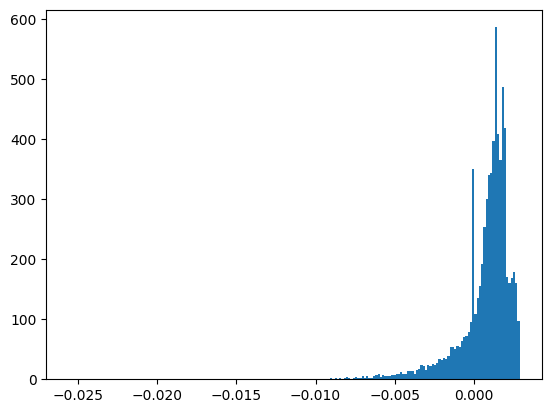

In [447]:
plt.hist(lyapunov_max_flat_sort[:,0], bins = 200, density=True)

In [814]:
hist = dict()
sum_h = dict()
hist_norm = dict()
hist_resh = dict()
edges = dict()
bins = 200
for i in range(n_k):
    hist[i], edges[i] = np.histogram(lyapunov_max_flat_sort[:,i],bins = bins)
    hist_norm[i] = hist[i]/(2*num**2)

In [886]:
dlambda = np.zeros(n_k)
for ik in range(n_k):
    dlambda[ik] = edges[ik][1] - edges[ik][0] 

In [606]:
index_lyapunov = np.argsort(lyapunov_max_flat)
index_lyapunov_2D = index_lyapunov.reshape([num,2*num,n_k])

lyapunov_max_flat_sort_SPLIT = np.zeros([bins,num,n_k])
lyapunov_max_flat_sort_weight = np.zeros([bins,num,n_k])
lyapunov_maxflatsort_weight = np.zeros([2*num**2,n_k])
for ik in range(n_k):
    lyapunov_max_flat_sort_SPLIT[:,:,ik] = np.array_split(lyapunov_max_flat_sort[:,ik],200)

for ik in range(n_k):    
    for i in range(bins):
        lyapunov_max_flat_sort_weight[i,:,ik] = lyapunov_max_flat_sort_SPLIT[i,:,ik] * hist[ik][i]
lyapunov_maxflatsort_weight = np.concatenate(lyapunov_max_flat_sort_weight)
print(np.concatenate(lyapunov_max_flat_sort_SPLIT[:,:,0]) - lyapunov_max_flat_sort[:,0])

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


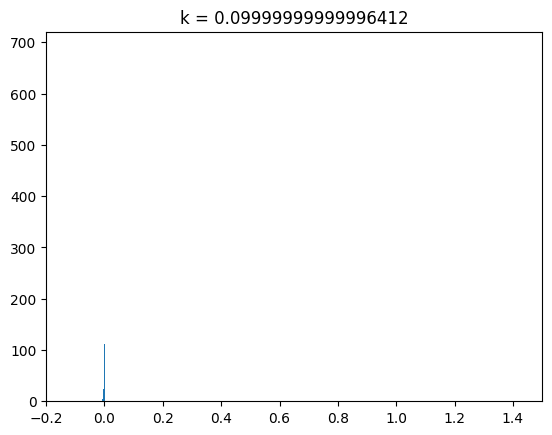

In [797]:
theta_range = [0,np.pi]
phi_range = [0,2*np.pi]

fig, ax = plt.subplots()

h, xedges, im = ax.hist([], density=True)

def update_hist(ik):
    ax.clear()
    ax.set_xlim([-0.2,1.5])
    h = ax.hist(lyapunov_max_flat_sort[:,ik], bins = 300, density=True)
    ax.set_title(f'k = {k[ik]}')
    return h

ani = animation.FuncAnimation(fig, update_hist, frames=n_k, interval=1000, repeat=False)
from IPython.display import HTML
display(HTML(ani.to_jshtml()))

/usr/local/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


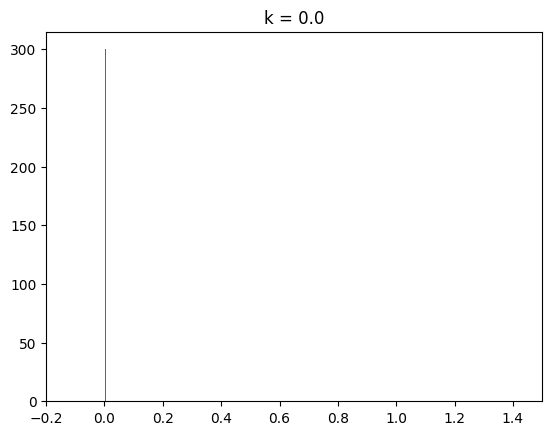

In [142]:
theta_range = [0,np.pi]
phi_range = [0,2*np.pi]

fig, ax = plt.subplots()

h, xedges, im = ax.hist([], density=True)

def update_hist(ik):
    ax.clear()
    ax.set_xlim([-0.2,1.5])
    h = ax.hist(lyapunov_max_flat[:,ik], bins = 300, density=True)
    ax.set_title(f'k = {k[ik]}')
    return h

ani = animation.FuncAnimation(fig, update_hist, frames=n_k, interval=1000, repeat=False)
from IPython.display import HTML
display(HTML(ani.to_jshtml()))

/usr/local/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


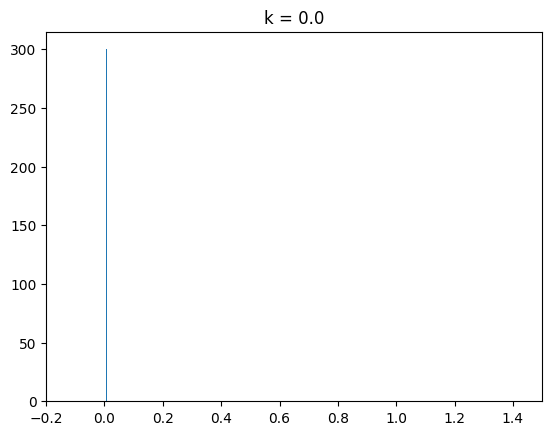

In [134]:
theta_range = [0,np.pi]
phi_range = [0,2*np.pi]

fig, ax = plt.subplots()

h, xedges, im = ax.hist([], density=True)

def update_hist(ik):
    ax.clear()
    ax.set_xlim([-0.2,1.5])
    h = ax.hist(lyapunov_max_flat[:,ik], bins = 300, density=True)
    ax.set_title(f'k = {k[ik]}')
    return h

ani = animation.FuncAnimation(fig, update_hist, frames=n_k, interval=1000, repeat=False)
from IPython.display import HTML
display(HTML(ani.to_jshtml()))

/usr/local/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


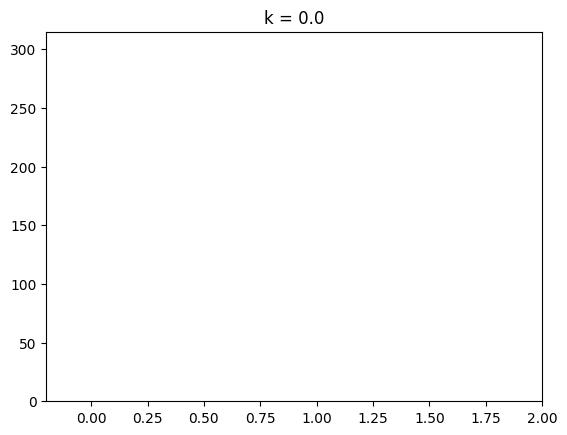

In [130]:
theta_range = [0,np.pi]
phi_range = [0,2*np.pi]

fig, ax = plt.subplots()

h, xedges, im = ax.hist([], density=True)

def update_hist(ik):
    ax.clear()
    ax.set_xlim([-0.2,2])
    h = ax.hist(lyapunov_max_flat[:,ik], bins = 300, density=True)
    ax.set_title(f'k = {k[ik]}')
    return h

ani = animation.FuncAnimation(fig, update_hist, frames=n_k, interval=1000, repeat=False)
from IPython.display import HTML
display(HTML(ani.to_jshtml()))

/usr/local/lib/python3.11/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


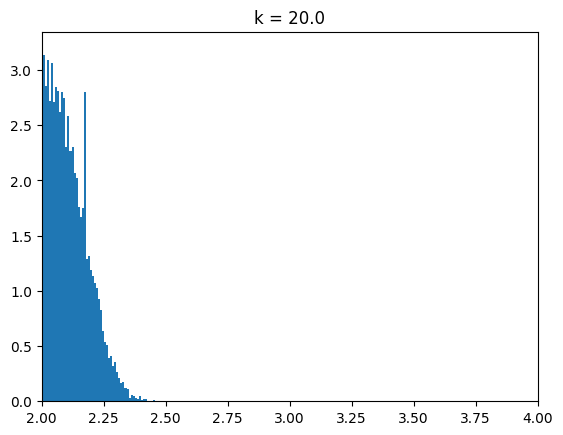

In [126]:
theta_range = [0,np.pi]
phi_range = [0,2*np.pi]

fig, ax = plt.subplots()

h, xedges, im = ax.hist([], density=True)

def update_hist(ik):
    ax.clear()
    ax.set_xlim([2,4])
    h = ax.hist(lyapunov_max_flat[:,ik], bins = 300, density=True)
    ax.set_title(f'k = {k[ik]}')
    return h

ani = animation.FuncAnimation(fig, update_hist, frames=n_k, interval=1000, repeat=False)
from IPython.display import HTML
display(HTML(ani.to_jshtml()))

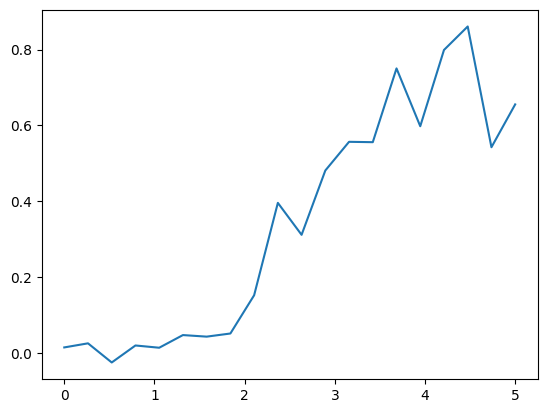

In [84]:
plt.plot(k,lyapunov_max[30,30,:])

In [819]:
weight_ = np.zeros([bins, n_k])
for ik in range(n_k):
    weight_[:,ik] = hist_norm[ik]

In [199]:
time = np.linspace(0,n_ita,n_ita)

In [ ]:
lyapunov_max_without_NaN = lyapunov_max
lyapunov_max_without_NaN[np.isnan(lyapunov_max_without_NaN)] = 0

lyapunov_max_flat = np.zeros([2*num**2,n_k])
lyapunov_max_flat_sort = np.zeros([2*num**2,n_k])
for i in range(n_k):
    lyapunov_max_flat[:,i] = lyapunov_max_without_NaN[:, :, i].reshape(2*num**2)
    lyapunov_max_flat_sort[:,i] = np.sort(lyapunov_max_flat[:,i])

index_lyapunov = np.argsort(lyapunov_max_flat)
index_lyapunov_2D = index_lyapunov.reshape([num,2*num,n_k])

lyapunov_max_flat_sort_SPLIT = np.zeros([bins,num,n_k])
lyapunov_max_flat_sort_weight = np.zeros([bins,num,n_k])
lyapunov_maxflatsort_weight = np.zeros([2*num**2,n_k])
for ik in range(n_k):
    lyapunov_max_flat_sort_SPLIT[:,:,ik] = np.array_split(lyapunov_max_flat_sort[:,ik],200)

for ik in range(n_k):    
    for i in range(bins):
        lyapunov_max_flat_sort_weight[i,:,ik] = lyapunov_max_flat_sort_SPLIT[i,:,ik] * hist[ik][i]
lyapunov_maxflatsort_weight = np.concatenate(lyapunov_max_flat_sort_weight)
   

lyapunov_max_without_NaN_dtdp = np.zeros([num,2*num,n_k])
for i in range(num):
    lyapunov_max_without_NaN_dtdp[i,:,:] = np.sin(theta_i[i])*lyapunov_max_without_NaN[i,:,:]*dphi*dtheta
lyapunov_max_dtdp_resh = lyapunov_max_without_NaN_dtdp.reshape([2*num**2,n_k])

lyapunov_max_without_NaN_resh = lyapunov_max_without_NaN_dtdp.reshape([2*num**2,n_k])
for i in range(n_k):
    lyapunov_max_without_NaN_resh[:,i] = lyapunov_max_without_NaN_resh[index_lyapunov[:,i],i]


In [850]:
index_lyapunov

{0: array([11909, 13577, 17701, ...,  3037,  2842,  8969]),
 1: array([17689, 19888,  8368, ...,  9710, 10709, 11708]),
 2: array([12645, 15799,  7912, ..., 10205,  9807, 10006]),
 3: array([12845, 13401, 18453, ...,  6927,  6926,  6727]),
 4: array([14012, 14016, 13433, ..., 11923, 12719, 14127]),
 5: array([ 4180,  5771, 12820, ..., 11044,  8631, 14592]),
 6: array([14011, 13913, 14411, ..., 17001,  4083, 18077]),
 7: array([13711, 13705,  3392, ...,  8269,  9427, 10013]),
 8: array([ 2783, 13701,  3194, ..., 10858,  1572,  9123]),
 9: array([ 7100,  8166, 11030, ..., 13810, 11022, 17436])}

In [847]:
index_lyapunov = dict()
for ik in range(n_k):   
    index_lyapunov[ik] = np.argsort(lyapunov_max_flat[:,ik])

In [851]:
a = lyapunov_max_flat_sort[:-1,9] - lyapunov_max_flat_sort[1:,9]

In [766]:
lyapunov_max.max()

0.918251186902982

In [845]:
for ik in range(n_k):   
    index_lyapunov[ik] = np.argsort(lyapunov_max_flat[:,ik])

In [848]:
for ik in range(n_k): 
    lyapunov_max_flat[:,ik] = lyapunov_max_flat[index_lyapunov[ik],ik]

In [849]:
b = lyapunov_max_flat_sort - lyapunov_max_flat

In [856]:
lyapunov_max_flat_SPLIT = np.zeros([bins,num,n_k])
lyapunov_max_flat_SPLIT_mean = np.zeros([bins,n_k])
for ik in range(n_k):
    lyapunov_max_flat_SPLIT[:,:,ik] = np.array_split(lyapunov_max_flat[:,ik],200)
for ik in range(n_k):
    for i in range(bins):
        lyapunov_max_flat_SPLIT_mean[i,ik] = np.mean(lyapunov_max_flat_SPLIT[i,:,ik])

In [865]:
# сплитнутое проинтегрировать со сплитнутым 
lambda_mean_Lapl = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
lyapunov_max_dtdp = np.zeros([num,2*num,n_k])

for i in range(num):
    lyapunov_max_dtdp[i,:,:] = np.sin(theta_i[i])*lyapunov_max_without_NaN[i,:,:]*dphi*dtheta

lyapunov_max_dtdp_resh = lyapunov_max_dtdp.reshape([2*num**2,n_k])

lyapunov_max_dtdp_resh_sort = np.zeros([20000,n_k])

for ik in range(n_k): 
    lyapunov_max_dtdp_resh_sort[:,ik] = lyapunov_max_dtdp_resh[index_lyapunov[ik],ik]

lyapunov_max_dtdp_resh_SPLIT = np.zeros([bins,num,n_k])
lyapunov_max_dtdp_resh_SPLIT_mean = np.zeros([bins,n_k])
lyapunov_max_dtdp_weight = np.zeros([bins,num,n_ita,n_k])
lyapunov_max_dtdp_weight_mean = np.zeros([bins,n_ita,n_k]) 
for ik in range(n_k):
    lyapunov_max_dtdp_resh_SPLIT[:,:,ik] = np.array_split(lyapunov_max_dtdp_resh_sort[:,ik],200)
    # lyapunov_max_dtdp_resh_SPLIT_mean[:,ik] = np.mean(lyapunov_max_dtdp_resh_SPLIT[:,:,ik])

for ik in range(n_k):    
    for i in range(bins):
        for j in range(n_ita):
            lyapunov_max_dtdp_weight[i,:,j,ik] = np.exp(lyapunov_max_dtdp_resh_SPLIT[i,:,ik]*time[j]) * weight_[i,ik]
            lyapunov_max_dtdp_weight_mean[i,j,ik] = np.mean(lyapunov_max_dtdp_weight[i,:,j,ik])

In [781]:
weight_[100:,9]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-05, 0.000e+00,
       1.500e-04, 2.000e-04, 1.000e-04, 3.000e-04, 6.000e-04, 3.000e-04,
       1.000e-03, 1.250e-03, 2.000e-03, 3.050e-03, 3.650e-03, 5.250e-03,
       8.050e-03, 1.015e-02, 1.390e-02, 1.730e-02, 2.085e-02, 2.405e-02,
       2.920e-02, 3.375e-02, 3.905e-02, 5.435e-02, 4.955e-02, 5.095e-02,
       5.585e-02, 5.715e-02, 5.935e-02, 5.555e-02, 5.530e-02, 5.055e-02,
       4.670e-02, 4.330e-02, 3.990e-02, 3.405e-02, 

In [871]:
lyapunov_maxdtdp_weight_conc = np.concatenate(lyapunov_max_dtdp_weight)
lyapunov_maxdtdp_weight_resh = lyapunov_maxdtdp_weight_conc.reshape([num,2*num,n_ita,n_k])

In [893]:
lyapunov_maxdtdp_weight = np.concatenate(lyapunov_max_dtdp_weight)

lambda_mean_Lapl = np.zeros([n_ita,n_k])
for i in range(n_ita):
    for ik in range(n_k):
        # lambda_mean_Lapl[i,ik] = np.trapz(lyapunov_max_dtdp_weight_mean[:,i,ik],lyapunov_max_flat_SPLIT_mean[:,ik])*2*np.pi**2
        lambda_mean_Lapl[i,ik] = np.trapz(lyapunov_max_dtdp_weight_mean[:,i,ik],dx = dlambda[ik])*2*np.pi**2

In [832]:
lyapunov_maxdtdp_weight = np.concatenate(lyapunov_max_dtdp_weight)

lambda_mean_Lapl = np.zeros([n_ita,n_k])
for i in range(n_ita):
    for ik in range(n_k):
        lambda_mean_Lapl[i,ik] = np.trapz(lyapunov_max_dtdp_weight_mean[:,i,ik],lyapunov_max_flat_sort[:,ik])*2*np.pi**2
# # # for i in range(n_ita):
# # #     for ik in range(n_k):
# # #         lambda_mean_Lapl[i,ik] = np.trapz(weight_[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i]),lyapunov_max_without_NaN_resh[:,ik])
# # #         # lambda_mean_Lapl[i,:,ik] = np.trapz(sum(sum(weight_resh[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i])*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num)),lyapunov_max_without_NaN_resh[:,ik])


In [894]:
Laplace = np.log(lambda_mean_Lapl)

In [881]:
sum(sum(lyapunov_maxdtdp_weight_resh[:,:,i,1]))

99.99999999999973

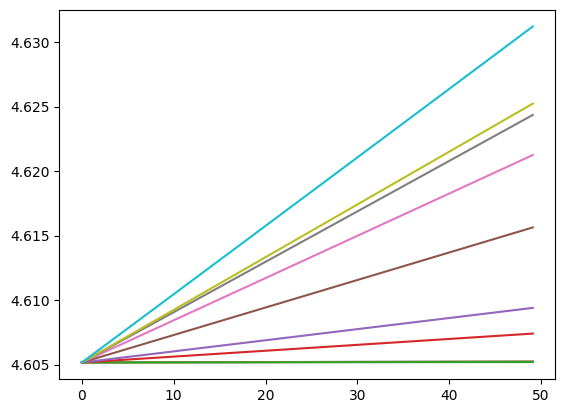

In [884]:
lambda_mean_t = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
for ik in range(n_k):
    for i in range(n_ita):
        lambda_mean_t[i,ik] = np.log(sum(sum(lyapunov_maxdtdp_weight_resh[:,:,i,ik])))
plt.plot(time[:50],lambda_mean_t[:50,:])
plt.show()

In [712]:
lyapunov_max_dtdp_resh_sort[:-1] - lyapunov_max_dtdp_resh_sort[1:]

array([[-5.78089968e-06, -6.01841859e-06, -6.09606743e-06, ...,
        -1.42738582e-06,  3.12907329e-08,  0.00000000e+00],
       [-1.26592596e-05,  1.27918970e-05,  4.15391709e-06, ...,
        -7.93672359e-07, -2.00544282e-06,  0.00000000e+00],
       [ 6.98082824e-06, -2.35317343e-08, -1.19231177e-07, ...,
         2.76500766e-07, -1.42966183e-07,  0.00000000e+00],
       ...,
       [ 7.68350082e-08, -6.70132840e-07, -4.25383265e-05, ...,
        -2.70364847e-04, -3.99888606e-05,  1.36992514e-04],
       [ 7.89297468e-08, -1.32278311e-07, -8.29812554e-08, ...,
        -2.91745482e-05,  5.96424641e-04, -1.46373497e-04],
       [-1.57409008e-06, -9.82470320e-08, -3.08011852e-07, ...,
        -7.00606451e-06, -6.20010008e-04,  5.31810123e-04]])

In [642]:
lyapunov_max_dtdp_resh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [638]:
lyapunov_max_dtdp_resh_SPLIT_mean = np.mean(lyapunov_max_dtdp_resh_SPLIT,axis = 1)

In [636]:
lambda_mean_Lapl[i,ik] = np.trapz(lyapunov_max_dtdp_weight_mean[:,i,ik],lyapunov_max_dtdp_resh[:,ik])

array([3.700e-03, 5.000e-05, 5.000e-05, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-05,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-05,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-05,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [620]:
lyapunov_maxdtdp_weight

array([[[5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        [5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        [5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        ...,
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00,
         0.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00,
         0.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00,
         0.00e+00]],

       [[5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        [5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        [5.00e-05, 5.00e-05, 5.00e-05, ..., 3.50e-04, 5.00e-05,
         3.70e-03],
        ...,
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00,
         0.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00,
         0.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00

In [619]:
lambda_mean_Lapl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [396]:
np.trapz(weight_[:,5]*lyapunov_max_flat_sort[:,5],lyapunov_max_flat_sort[:,5])

1.8627869341973058e-06

In [ ]:
# сплитнутое проинтегрировать со сплитнутым 
lambda_mean_Lapl = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
# weight_resh = weight.reshape([2*num**2,n_k])
# lyapunov_max_without_NaN_resh = lyapunov_max_without_NaN_dtdp.reshape([2*num**2,n_k])
# lyapunov_max_without_NaN_resh = lyapunov_max_without_NaN_resh[index_lyapunov,:]
for i in range(n_ita):
    for ik in range(n_k):
        lambda_mean_Lapl[i,ik] = np.trapz(weight_[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i]),lyapunov_max_without_NaN_resh[:,ik])
        # lambda_mean_Lapl[i,:,ik] = np.trapz(sum(sum(weight_resh[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i])*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num)),lyapunov_max_without_NaN_resh[:,ik])
Laplace = np.log(lambda_mean_Lapl)

In [420]:
lambda_mean_Lapl = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
# weight_resh = weight.reshape([2*num**2,n_k])
# lyapunov_max_without_NaN_resh = lyapunov_max_without_NaN_dtdp.reshape([2*num**2,n_k])
# lyapunov_max_without_NaN_resh = lyapunov_max_without_NaN_resh[index_lyapunov,:]
for i in range(n_ita):
    for ik in range(n_k):
        lambda_mean_Lapl[i,ik] = np.trapz(weight_[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i]),lyapunov_max_without_NaN_resh[:,ik])
        # lambda_mean_Lapl[i,:,ik] = np.trapz(sum(sum(weight_resh[:,ik]*np.exp(lyapunov_max_without_NaN_resh[:,ik]*time[i])*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num)),lyapunov_max_without_NaN_resh[:,ik])
Laplace = np.log(lambda_mean_Lapl)

/var/folders/6b/5jc3m7d10jj6vfgcnfz8y2_00000gn/T/ipykernel_1845/76490345.py:11: RuntimeWarning: divide by zero encountered in log
  Laplace = np.log(lambda_mean_Lapl)


In [422]:
lambda_mean_Lapl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

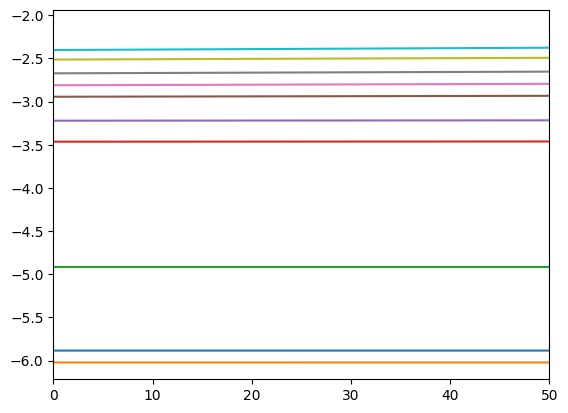

In [897]:
plt.plot(time[:],Laplace)
plt.xlim(0,50)
plt.show()

In [ ]:
lambda_mean_t = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
for ik in range(n_k):
    lambda_mean_t[:,ik] =np.log( sum(sum(weight[i,j,ik]*np.exp(lyapunov_max_without_NaN[i,j,ik]*time)*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num)))
plt.plot(time[:50],lambda_mean_t[:50,:])
plt.show()
# plt.xlim(0,50)
# plt.ylim(0,10)

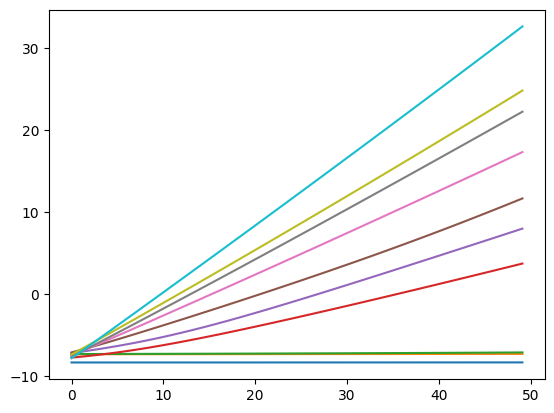

In [279]:
lambda_mean_t = np.zeros([n_ita,n_k])
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
for ik in range(n_k):
    lambda_mean_t[:,ik] =np.log(sum(sum(weight[i,j,ik]*np.exp(lyapunov_max_without_NaN[i,j,ik]*time)*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num)))
plt.plot(time[:50],lambda_mean_t[:50,:])
plt.show()
# plt.xlim(0,50)
# plt.ylim(0,10)

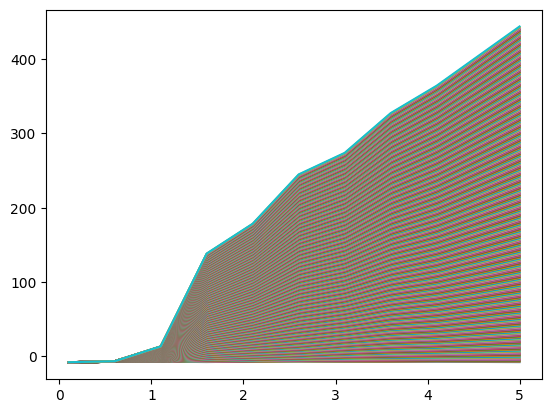

In [281]:
plt.plot(k,lambda_mean_t.T)
plt.show()

(0.0, 10.0)

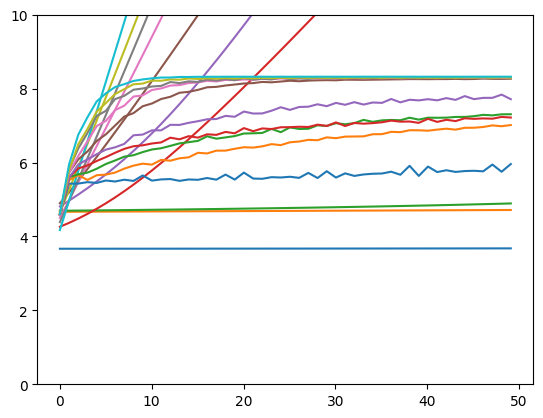

In [249]:
plt.plot(time[:50],lambda_mean_t[:50,:]+12,time[:50],entropy70)
plt.ylim(0,10)

In [236]:
k.shape[0]

10

In [228]:
import scipy as sc
from scipy.optimize import leastsq
import matplotlib.colors as mcolors

In [229]:
colormap2 = list(mcolors.TABLEAU_COLORS) 
colormap1 = list(mcolors.BASE_COLORS)
colormap = list(mcolors.CSS4_COLORS)

In [269]:
k

array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 5. ])

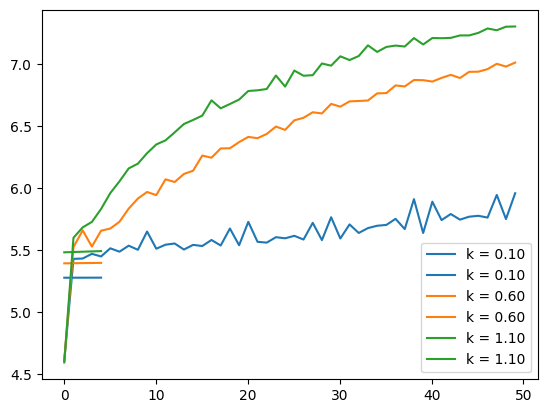

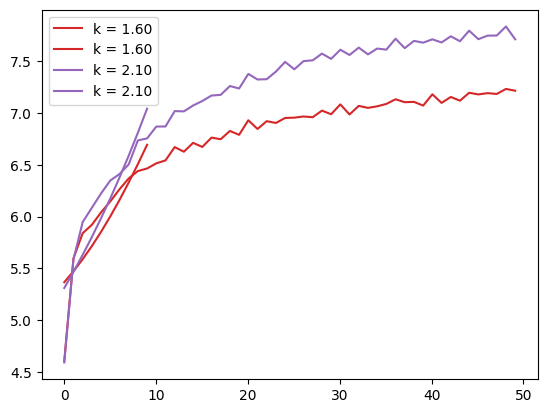

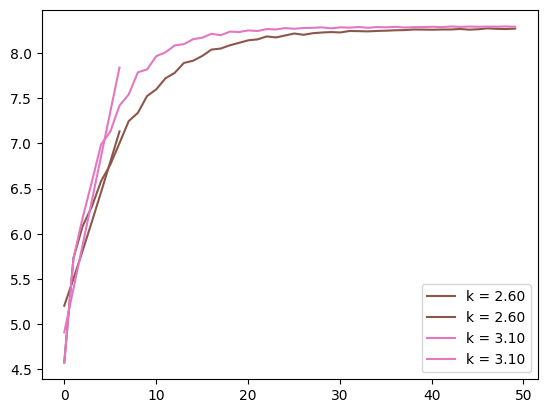

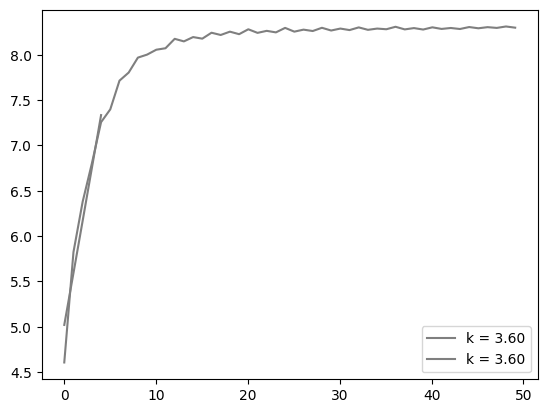

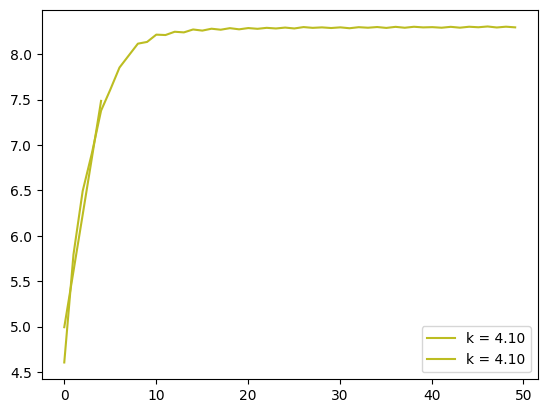

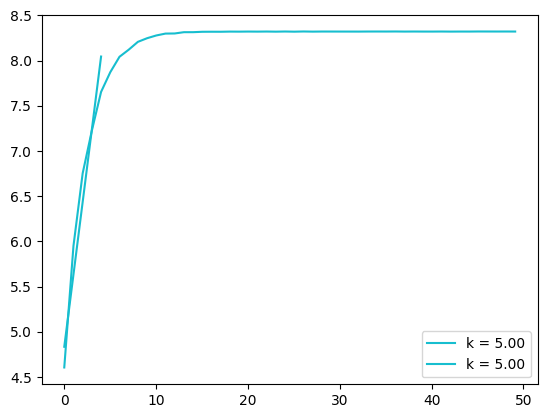

In [276]:
fitfunc  = lambda a, x: x + a
errfunc  = lambda a, x, y: (y - fitfunc(a, x))
init  = 40
for ik in range(3):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:5,ik], entropy70[:5,ik]))
    cS = outS[0]
    plt.plot(time[:5], fitfunc(cS, lambda_mean_t[:5,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()
    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()
for ik in range(3,5):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:10,ik], entropy70[:10,ik]))
    cS = outS[0]
    plt.plot(time[:10], fitfunc(cS, lambda_mean_t[:10,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()
for ik in range(5,7):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:7,ik], entropy70[:7,ik]))
    cS = outS[0]
    plt.plot(time[:7], fitfunc(cS, lambda_mean_t[:7,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()
    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()
for ik in range(7,8):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:5,ik], entropy70[:5,ik]))
    cS = outS[0]
    plt.plot(time[:5], fitfunc(cS, lambda_mean_t[:5,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()
    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()
for ik in range(8,9):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:5,ik], entropy70[:5,ik]))
    cS = outS[0]
    plt.plot(time[:5], fitfunc(cS, lambda_mean_t[:5,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()
    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()
for ik in range(9,10):
    outS = leastsq(errfunc, init, args=(lambda_mean_t[:5,ik], entropy70[:5,ik]))
    cS = outS[0]
    plt.plot(time[:5], fitfunc(cS, lambda_mean_t[:5,ik]), time[:50], entropy70[:,ik], color = colormap2[ik],label = f"k = {k[ik]:.2f}")
    plt.legend()
    # plt.ylim(0,10)
    # plt.xlim(0,10)
plt.show()

In [260]:
cS

array([11.47685797])

In [211]:
entropy70 = np.load('/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/entropy70.npy')

(0.0, 50.0)

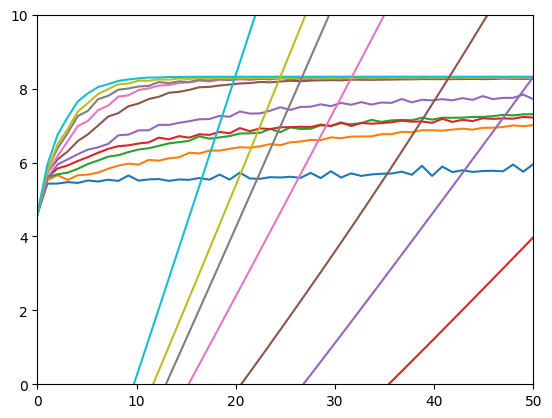

In [212]:
plt.plot(np.linspace(0,50,50),entropy70,time,lambda_mean_t)
plt.ylim(0,10)
plt.xlim(0,50)

(0.0, 50.0)

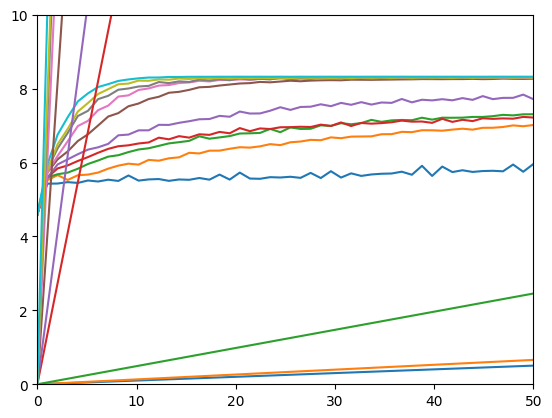

In [243]:
plt.plot(np.linspace(0,50,50),entropy70,time,KS)
plt.ylim(0,10)
plt.xlim(0,50)

In [241]:
KS = np.zeros([n_ita,n_k])
for i in range(n_k):
    KS[:,i] = np.log(np.exp(lambda_mean[i]*time[:]))

/var/folders/6b/5jc3m7d10jj6vfgcnfz8y2_00000gn/T/ipykernel_1845/1960813396.py:3: RuntimeWarning: overflow encountered in exp
  KS[:,i] = np.log(np.exp(lambda_mean[i]*time[:]))


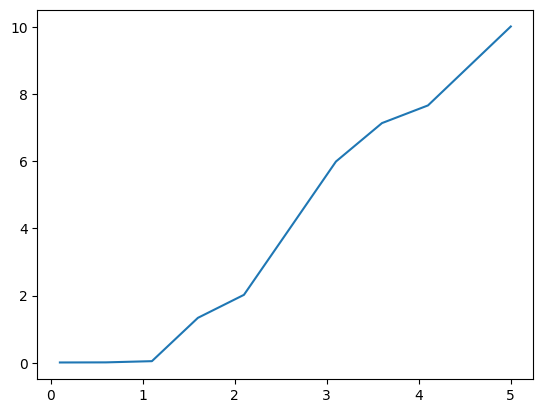

In [240]:
lyapunov_max_without_NaN = lyapunov_max
lyapunov_max_without_NaN[np.isnan(lyapunov_max_without_NaN)] = 0
lambda_mean = np.zeros(n_k)
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
for ik in range(n_k):
    lambda_mean[ik] = sum(sum(lyapunov_max_without_NaN[i,j,ik]*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num))
plt.plot(k,lambda_mean)

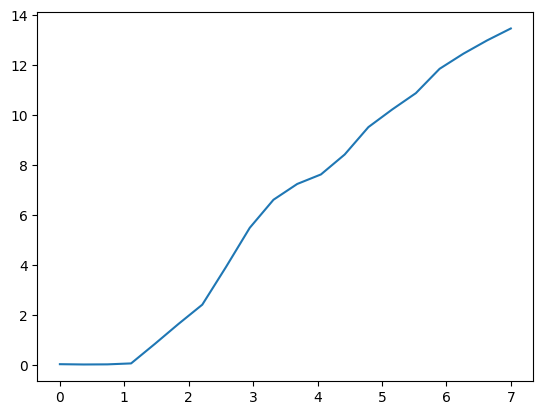

In [171]:
lyapunov_max_without_NaN = lyapunov_max
lyapunov_max_without_NaN[np.isnan(lyapunov_max_without_NaN)] = 0
lambda_mean = np.zeros(n_k)
dphi = phi_i[1] - phi_i[0]
dtheta = theta_i[1] - theta_i[0]
for ik in range(n_k):
    lambda_mean[ik] = sum(sum(lyapunov_max_without_NaN[i,j,ik]*np.sin(theta_i[i])*dphi*dtheta for j in range(2*num)) for i in range(num))
plt.plot(k,lambda_mean)

In [32]:
lambda_mean/lambda_mean.max()

array([0.00590158, 0.01389302, 0.02224501, 0.14188951, 0.2210159 ,
       0.41139983, 0.59869051, 0.71268645, 0.77064434, 1.        ])

In [15]:
np.save('lambda_mean.npy',lambda_mean)

In [43]:
import multiprocessing as mp
from parallel_KSentropy import process_ik

if __name__ == '__main__':
    # Остальной код остается без изменений
       # Ваш основной код, включая инициализацию данных
    num = 100
    n_ita15 = 100
    n_k15 = 50
    
    k15 = np.linspace(0, 15, n_k15)

    eig_max15 = np.zeros([num, 2*num, n_k15])
    lyapunov_max15 = np.zeros([num, 2*num, n_k15])

    theta_i = np.zeros([num, 2*num])
    phi_i = np.zeros([num, 2*num])

    # Основной параллельный код
    with mp.Pool(processes=4) as pool:
        results15 = pool.starmap(process_ik, [(ik, theta_i, phi_i, num, n_ita15, k15) for ik in range(n_k15)])
    
    # Объединение результатов
    for ik, eig_max_res15, lyapunov_max_res15 in results15:
        eig_max15[:, :, ik] = eig_max_res15
        lyapunov_max15[:, :, ik] = lyapunov_max_res15

/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))
/Users/nataliyaarefyeva/Desktop/научка condmat/python/Kicked TOP/parallel_KSentropy.py:37: RuntimeWarning: invalid value encountered in double_scalars
  lyapunov_max_local[j,t] = np.log(eig_max_local[j,t]**(1/n_ita))


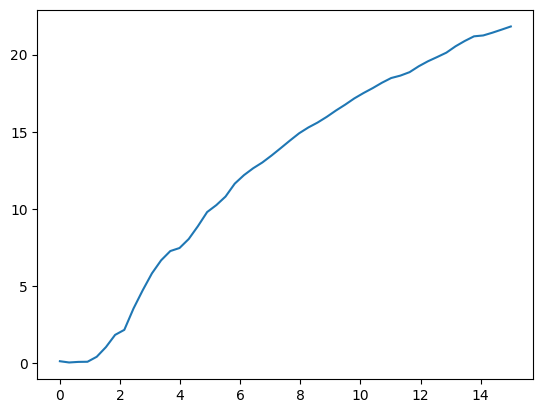

In [45]:
lyapunov_max_without_NaN15 = lyapunov_max15
lyapunov_max_without_NaN15[np.isnan(lyapunov_max_without_NaN15)] = 0
lambda_mean15 = np.zeros(n_k15)
dphi = phi_i[0,1] - phi_i[0,0]
dtheta = theta_i[1,0] - theta_i[0,0]
for ik in range(n_k15):
    lambda_mean15[ik] = sum(sum(lyapunov_max_without_NaN15[i,j,ik]*np.sin(theta_i[i,j])*dphi*dtheta for j in range(2*num)) for i in range(num))
plt.plot(k15,lambda_mean15)

In [33]:
S_paper = np.loadtxt('/Users/nataliyaarefyeva/Downloads/S_j40_m4q7.txt')
k_paper = np.loadtxt('/Users/nataliyaarefyeva/Downloads/k_j40_m4q7.txt')
S_paper = S_paper[np.where(k_paper>0)]
k_paper = k_paper[np.where(k_paper>0)]
# S_paper = S_paper#/S_paper.max()
k_paper = k_paper[np.where(k_paper>0)]

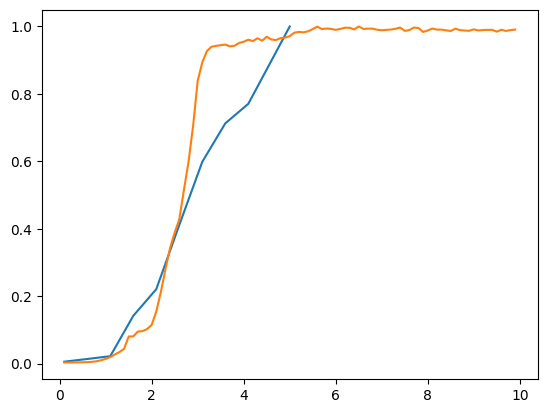

In [35]:
plt.plot(k, lambda_mean/lambda_mean.max(), k_paper, S_paper/S_paper.max())
# plt.xlim(0,10)
# plt.ylim(0,18)

In [71]:
# plt.plot(k,lambda_mean, k_paper,S_paper)